In [3]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


budgets=[5,10,15]  # Assumpiton of the budget
for budget in budgets:
    
    '''
    DATA: https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html
    regions               population
    --------------------------------
    0=Midtown               391371
    1=LowerManhattan        382654
    2=Harlem                335109
    3=UpperEastSide         229668
    4=UpperWestSide         209084
    '''
    regions,population=gp.multidict({0:391371,
                                     1:382654,
                                     2:335109,
                                     3:229668,
                                     4:209084})

    '''
    COVERAGE OF THE REGION TABLE OF THE POSSIBLE TOWER LOCATIONS
    Neigborhood/Possible Tower Locations	Midtown(Region0)	Lower Manhattan(Region1)	Harlem(Region2)	 UpperEastSide(Region3)	UpperWestSide(Region4)
    -------------------------------------------------------------------------------------------------------------------------------------------------------
    World Trade Center(Tower0)	                  1	                   1	                       0	             0	                      0
    Empire State(Tower1)	                      1	                   0	                       0                 0	                      0
    30 Hudson Yard(Tower2)	                      0	                   0	                       0	             0	                      1
    Central Park Tower(Tower3)                    1	                   0	                       0	             1                     	  1
    482 Park Avenue(Tower4)                    	  1	                   0	                       0	             1	                      1
    Trump Palace Condominiums(Tower5)	          0	                   0	                       1	             1	                      0
    200 Amsterdam Sales Gallery(Tower6)	          0	                   0	                       1	             0	                      1
    Inwood Tower(Tower7)	                      0	                   0	                       1	             0	                      0
    Hess Center of Medicine(Tower8)               0                    0                       	   1	             1	                      0
    '''

    sites,coverage,cost=gp.multidict({0:[{0,1},5],
                                 1:[{0},5],
                                 2:[{4},5],
                                 3:[{0,3,4},5],
                                 4:[{0,3,4},5],
                                 5:[{2,3},5],
                                 6:[{2,4},5],
                                 7:[{2},5],
                                 8:[{2,3},5]})

    # MIP  model formulation
    m = gp.Model("cell_tower")

    build = m.addVars(len(sites), vtype=GRB.BINARY, name="Build")
    is_covered = m.addVars(len(regions), vtype=GRB.BINARY, name="Is_covered")

    m.addConstrs((gp.quicksum(build[t] for t in sites if r in coverage[t]) >= is_covered[r]
                            for r in regions), name="Build2cover")

    m.addConstr(build.prod(cost) <= budget, name="budget")

    m.setObjective(is_covered.prod(population), GRB.MAXIMIZE)

    m.optimize()

    for tower in build.keys():
        if (abs(build[tower].x) > 1e-6):
            print(f"\n Build a cell tower at location Tower {tower}.")

    total_population = 0

    for region in range(len(regions)):
        total_population += population[region]

    coverage = round(100*m.objVal/total_population, 2)

    print(f"\n The population coverage associated to the cell towers build plan is: {coverage} %")

    total_cost = 0


    for tower in range(len(sites)):
        if (abs(build[tower].x) > 0.5):
            total_cost += cost[tower]*int(build[tower].x)

    budget_consumption = round(100*total_cost/budget, 2)

    print(f"\n The percentage of budget consumed associated to the cell towers build plan is: {budget_consumption} %")


Academic license - for non-commercial use only - expires 2021-07-10
Using license file C:\Users\okanc\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6 rows, 14 columns and 31 nonzeros
Model fingerprint: 0xb331ab96
Variable types: 0 continuous, 14 integer (14 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [2e+05, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 6 columns
Presolve time: 0.00s
Presolved: 5 rows, 8 columns, 16 nonzeros
Found heuristic solution: objective 774025.00000
Variable types: 0 continuous, 8 integer (8 binary)

Root relaxation: objective 8.301230e+05, 5 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

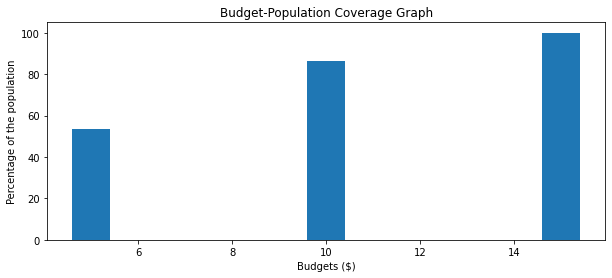

In [11]:
Budgets=[5,10,15]
Population_Coverage=[53.63,86.49,100]
plt.figure(figsize=(10,4))
plt.title('Budget-Population Coverage Graph')
plt.xlabel('Budgets ($)')
plt.ylabel('Percentage of the population')
plt.bar(Budgets,Population_Coverage)
plt.show()


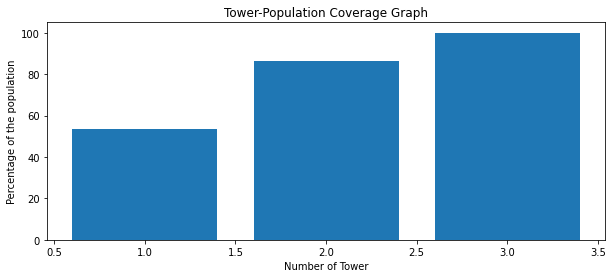

In [13]:
Number_of_Towers=[1,2,3]
Population_Coverage=[53.63,86.49,100]
plt.figure(figsize=(10,4))
plt.title('Tower-Population Coverage Graph')
plt.xlabel('Number of Tower')
plt.ylabel('Percentage of the population')
plt.bar(Number_of_Towers,Population_Coverage)
plt.show()